Total points for this extra credit exercise: 2

Make sure that you run all your codes and that all results are printed.

Please note: Copying and pasting other people's work is absolutely prohibited. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sklearn.datasets as data
import sklearn.cluster as cluster
import time
from sklearn import cluster, datasets

In this exercise, you will work with real car crash data from the city of Chicago from the beginning of 2024 up to May 1, 2024. There are 33,725 car crashes that happened in this time, and in the CSV file (Chicago_Car_Crashes_2024), you can find XY coordinates of those events.

### Question 1 (50%)

Using DBSCAN, try different eps and min_samples to compare the clustering results.

a) For min_samples = 100, can you find an eps which produces ~4% of outliers? What is that eps and in which parts of Chicago outliers are located? (25%)

b) For eps = .05, can you find min_points which produces ~1% outliers (less and close to 1%, but more than zero)? (25%)

In [2]:
# your code here
#a)
car_crashes = pd.read_csv("Chicago_Car_Crashes_2024.csv")

X = car_crashes[['X', 'Y']].values

def calculate_outlier_percentage(labels):
    n_outliers = np.sum(labels == -1)
    total_points = len(labels)
    outlier_percentage = (n_outliers / total_points) * 100
    return outlier_percentage

min_samples = 100
eps_values = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]  
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    outlier_percentage = calculate_outlier_percentage(labels)
    print(f"For eps={eps}, outlier percentage: {outlier_percentage}%")

For eps=0.001, outlier percentage: 100.0%
For eps=0.005, outlier percentage: 65.76130467012602%
For eps=0.01, outlier percentage: 4.05930318754633%
For eps=0.05, outlier percentage: 0.0%
For eps=0.1, outlier percentage: 0.0%
For eps=0.5, outlier percentage: 0.0%


In [3]:
#b)
eps = 0.05
min_samples_values = [50, 100, 150, 200]
for min_samples in min_samples_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)
    outlier_percentage = calculate_outlier_percentage(labels)
    print(f"For min_samples={min_samples}, outlier percentage: {outlier_percentage}%")

For min_samples=50, outlier percentage: 0.0%
For min_samples=100, outlier percentage: 0.0%
For min_samples=150, outlier percentage: 0.0%
For min_samples=200, outlier percentage: 0.0%


### Question 2 (50%)

Using DBSCAN for Anomalous Cluster Detection, detect which areas of Chicago have the highest number of car crashes (i.e., anomalous clusters of car crashes). Scan through a wide range of parameter values. Note: the interpretation is different from above. Now the points assigned to clusters are considered anomalous, and the remaining points are considered normal!

a) Find and report the number of detected points (with eps and min_samples) for the situation when 3 noticeable clusters of outliers could be distinguished (25%)

b) Report all the maps in your search process (similar to Manhattan exercise in class demo) and answer which one represents those 3 clusters. What are those 3 clusters and where they are located in the city? Why do you think they happen to be outliers? (25%)

In [5]:
# your code here
#a)
def plot_clusters(labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.colorbar(label='Cluster Label')
    plt.show()

eps_values = [0.01, 0.5]  
min_samples_values = [50, 100, 150, 200]  
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(f"For eps={eps} and min_samples={min_samples}, number of clusters: {n_clusters}")

For eps=0.01 and min_samples=50, number of clusters: 3
For eps=0.01 and min_samples=100, number of clusters: 8
For eps=0.01 and min_samples=150, number of clusters: 3
For eps=0.01 and min_samples=200, number of clusters: 5
For eps=0.5 and min_samples=50, number of clusters: 1
For eps=0.5 and min_samples=100, number of clusters: 1
For eps=0.5 and min_samples=150, number of clusters: 1
For eps=0.5 and min_samples=200, number of clusters: 1


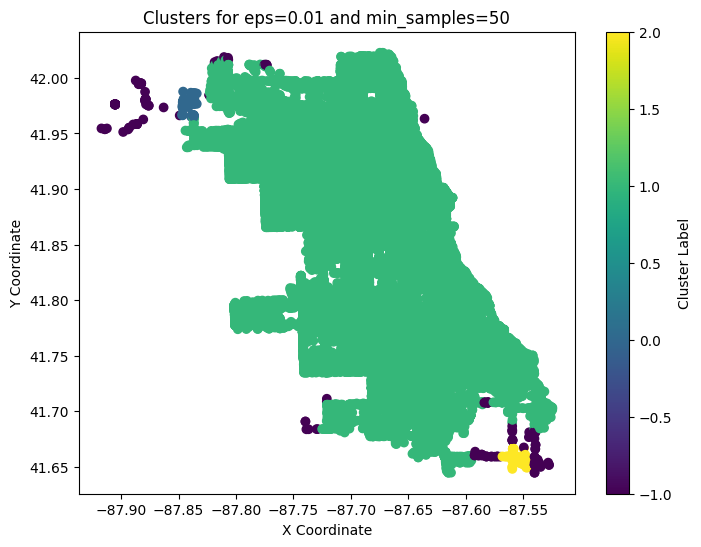

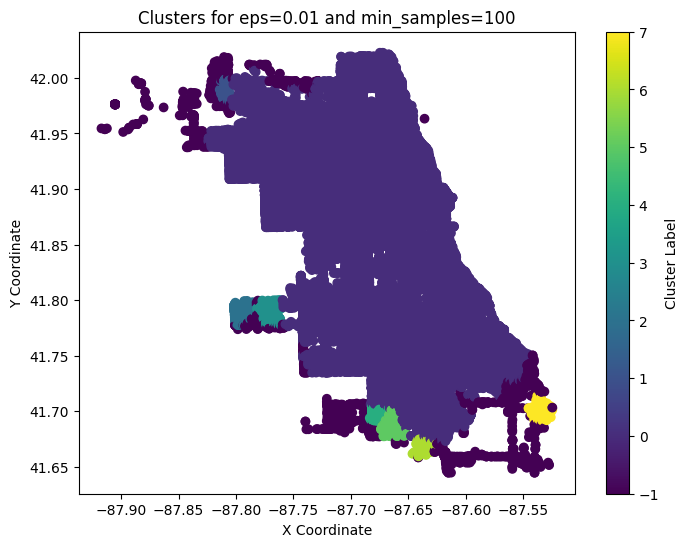

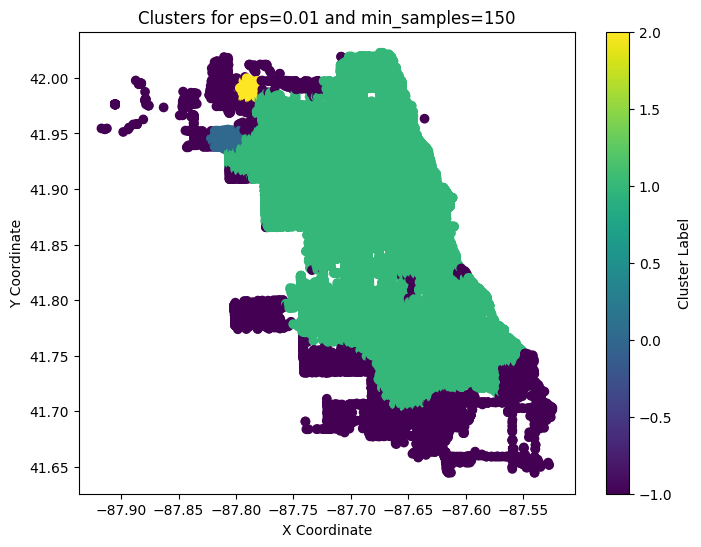

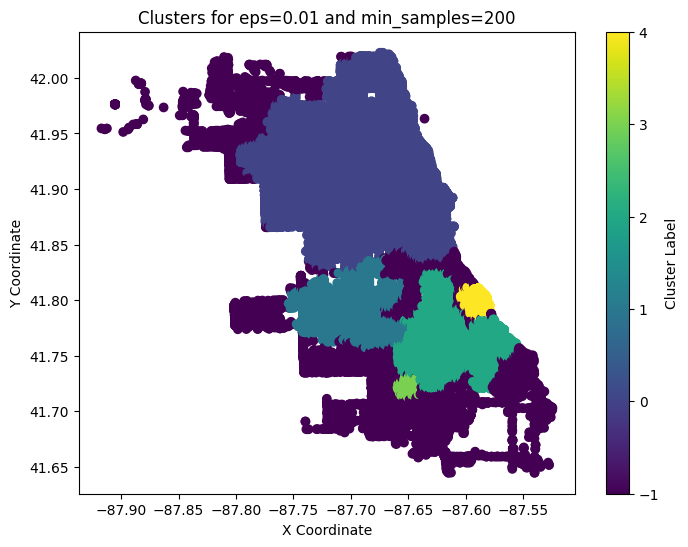

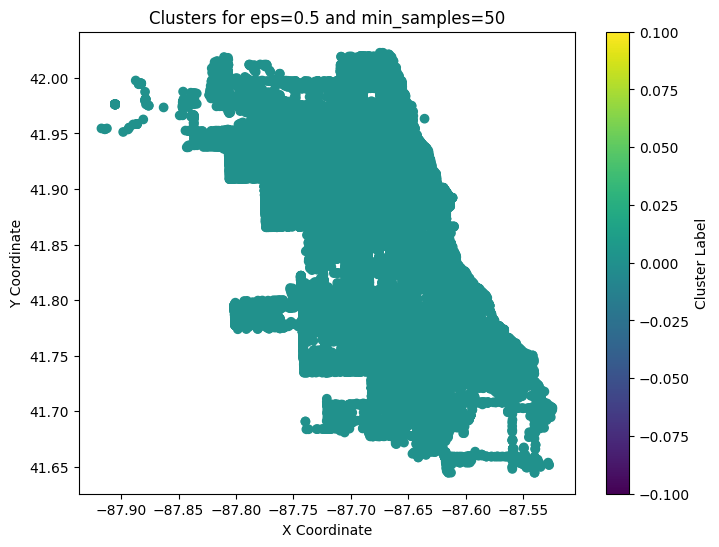

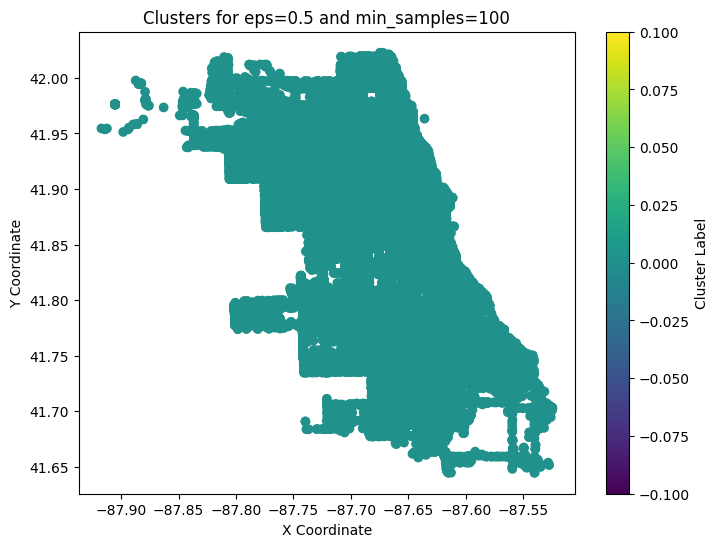

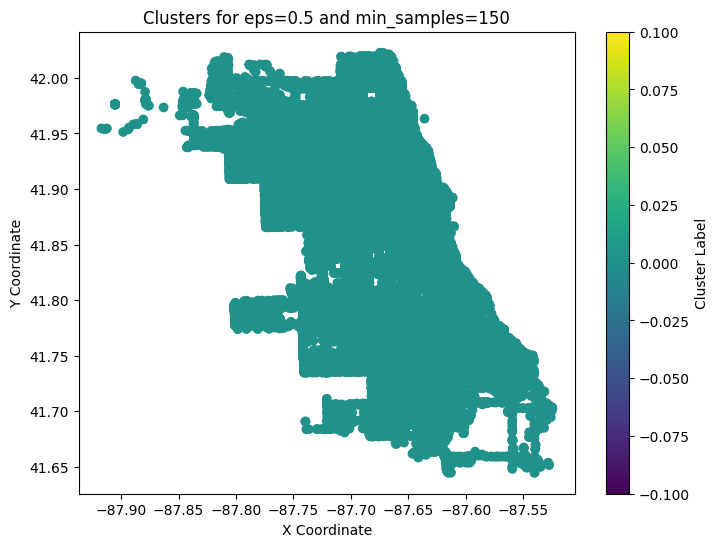

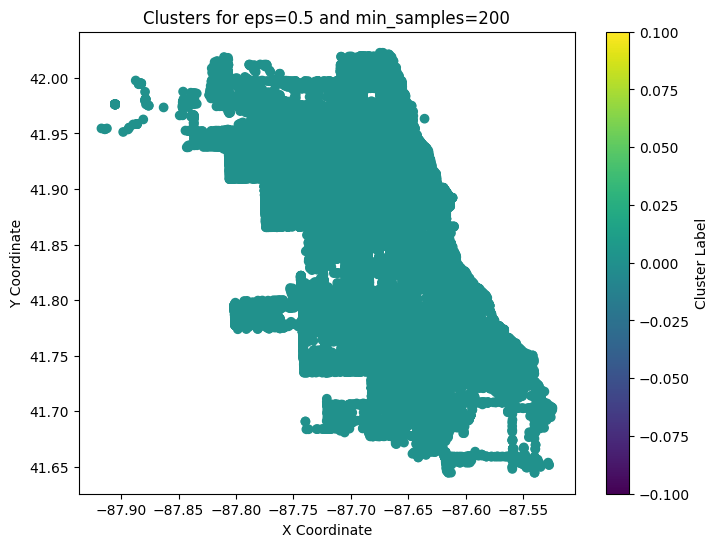

In [6]:
# your answer here
#b)
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)
        plot_clusters(labels, f"Clusters for eps={eps} and min_samples={min_samples}")

there are two plots with those 3 clusters, (eps=0.01, min_samples=50) and (eps=0.01,min_samples=150) , they are located in the margin of the city. I think they happen to be outliers because they are very far from the other normal points in those two parameter values .